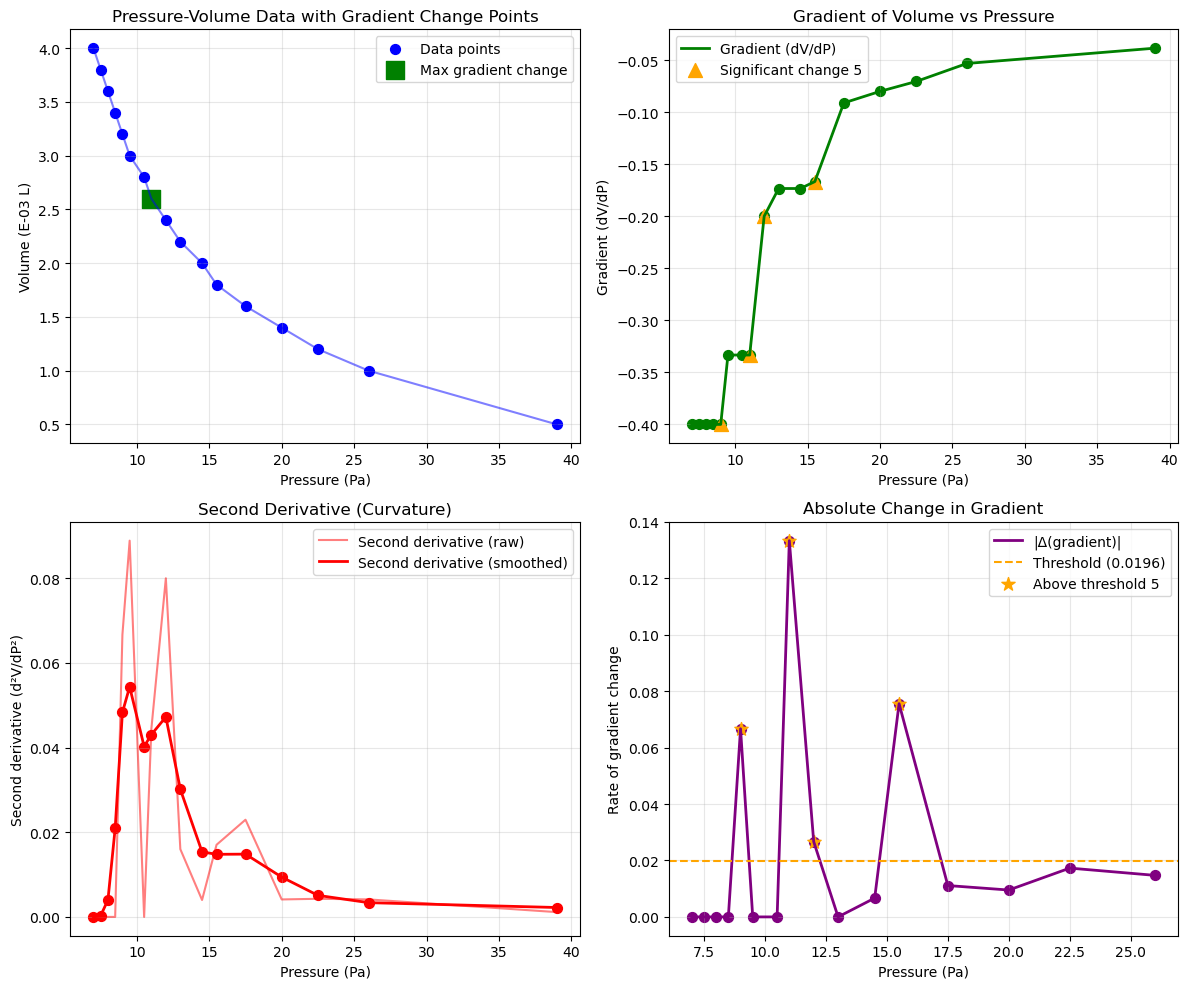

GRADIENT CHANGE ANALYSIS

1. Data points: 17
   Pressure range: 7.0 to 39.0 Pa
   Volume range: 4.0 to 0.5 (E-03 L)

2. Gradient statistics:
   Mean gradient: -0.2380
   Std of gradient: 0.1376
   Min gradient: -0.4000 at P=7.0 Pa
   Max gradient: -0.0385 at P=39.0 Pa

4. Maximum gradient change occurs between:
   Points 7 and 8
   At P=11.0 to 12.0 Pa
   Gradient change magnitude: 0.1333

5. Significant gradient changes (above 75th percentile):
   Change 1: Between points 4 and 5
     Pressure: 9.0 to 9.5 Pa
     Gradient change: 0.0667
     Volume change per pressure: -0.4000 to -0.3333
   Change 2: Between points 7 and 8
     Pressure: 11.0 to 12.0 Pa
     Gradient change: 0.1333
     Volume change per pressure: -0.3333 to -0.2000
   Change 3: Between points 8 and 9
     Pressure: 12.0 to 13.0 Pa
     Gradient change: 0.0267
     Volume change per pressure: -0.2000 to -0.1733
   Change 4: Between points 11 and 12
     Pressure: 15.5 to 17.5 Pa
     Gradient change: 0.0756
     Volum

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import gaussian_filter1d

# Your data
pressure = np.array([7, 7.5, 8, 8.5, 9, 9.5, 10.5, 11, 12, 13, 14.5, 15.5, 17.5, 20, 22.5, 26, 39])
volume = np.array([4, 3.8, 3.6, 3.4, 3.2, 3, 2.8, 2.6, 2.4, 2.2, 2, 1.8, 1.6, 1.4, 1.2, 1, 0.5])

# Since volume has E-03 notation in the header, multiply by 1e-3 if needed
# Based on the values, it looks like volume is already in the correct scale (4, 3.8, etc.)
# So we'll keep it as is

# Calculate gradients (first derivative)
volume_gradient = np.gradient(volume, pressure)

# Calculate second derivative to find inflection points
second_derivative = np.gradient(volume_gradient, pressure)

# Smooth the second derivative to reduce noise
second_derivative_smooth = gaussian_filter1d(second_derivative, sigma=1)

# Find points where second derivative changes sign (inflection points)
inflection_indices = np.where(np.diff(np.sign(second_derivative_smooth)))[0]

# Find the point with maximum gradient change
max_gradient_change_idx = np.argmax(np.abs(np.diff(volume_gradient)))

# Alternative approach: Find points where gradient changes significantly
gradient_diff = np.abs(np.diff(volume_gradient))
significant_change_indices = np.where(gradient_diff > np.percentile(gradient_diff, 75))[0]

# Create the plot
plt.figure(figsize=(12, 10))

# Plot 1: Original data with gradient change points
plt.subplot(2, 2, 1)
plt.scatter(pressure, volume, color='blue', s=50, label='Data points')
plt.plot(pressure, volume, 'b-', alpha=0.5)

# Mark inflection points
if len(inflection_indices) > 0:
    for idx in inflection_indices:
        plt.scatter(pressure[idx], volume[idx], color='red', s=100, marker='o', 
                   label=f'Inflection point {idx+1}' if idx == inflection_indices[0] else "")
        
# Mark point of maximum gradient change
plt.scatter(pressure[max_gradient_change_idx], volume[max_gradient_change_idx], 
           color='green', s=150, marker='s', label='Max gradient change')

plt.xlabel('Pressure (Pa)')
plt.ylabel('Volume (E-03 L)')
plt.title('Pressure-Volume Data with Gradient Change Points')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Gradient (first derivative)
plt.subplot(2, 2, 2)
plt.plot(pressure, volume_gradient, 'g-', linewidth=2, label='Gradient (dV/dP)')
plt.scatter(pressure, volume_gradient, color='green', s=50)

# Mark significant changes
if len(significant_change_indices) > 0:
    for idx in significant_change_indices:
        plt.scatter(pressure[idx], volume_gradient[idx], color='orange', s=100, marker='^',
                   label=f'Significant change {idx+1}' if idx == significant_change_indices[0] else "")

plt.xlabel('Pressure (Pa)')
plt.ylabel('Gradient (dV/dP)')
plt.title('Gradient of Volume vs Pressure')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Second derivative
plt.subplot(2, 2, 3)
plt.plot(pressure, second_derivative, 'r-', alpha=0.5, label='Second derivative (raw)')
plt.plot(pressure, second_derivative_smooth, 'r-', linewidth=2, label='Second derivative (smoothed)')
plt.scatter(pressure, second_derivative_smooth, color='red', s=50)

# Mark zero crossings (inflection points)
zero_crossings = np.where(np.diff(np.sign(second_derivative_smooth)))[0]
for idx in zero_crossings:
    plt.axvline(x=pressure[idx], color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Pressure (Pa)')
plt.ylabel('Second derivative (d²V/dP²)')
plt.title('Second Derivative (Curvature)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Rate of gradient change
plt.subplot(2, 2, 4)
plt.plot(pressure[:-1], gradient_diff, 'purple', linewidth=2, label='|Δ(gradient)|')
plt.scatter(pressure[:-1], gradient_diff, color='purple', s=50)

# Mark points above threshold
threshold = np.percentile(gradient_diff, 75)
plt.axhline(y=threshold, color='orange', linestyle='--', label=f'Threshold ({threshold:.4f})')

for idx in significant_change_indices:
    plt.scatter(pressure[idx], gradient_diff[idx], color='orange', s=100, marker='*',
               label=f'Above threshold {idx+1}' if idx == significant_change_indices[0] else "")

plt.xlabel('Pressure (Pa)')
plt.ylabel('Rate of gradient change')
plt.title('Absolute Change in Gradient')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("=" * 60)
print("GRADIENT CHANGE ANALYSIS")
print("=" * 60)

print(f"\n1. Data points: {len(pressure)}")
print(f"   Pressure range: {pressure[0]} to {pressure[-1]} Pa")
print(f"   Volume range: {volume[0]} to {volume[-1]} (E-03 L)")

print(f"\n2. Gradient statistics:")
print(f"   Mean gradient: {np.mean(volume_gradient):.4f}")
print(f"   Std of gradient: {np.std(volume_gradient):.4f}")
print(f"   Min gradient: {np.min(volume_gradient):.4f} at P={pressure[np.argmin(volume_gradient)]} Pa")
print(f"   Max gradient: {np.max(volume_gradient):.4f} at P={pressure[np.argmax(volume_gradient)]} Pa")

if len(inflection_indices) > 0:
    print(f"\n3. Inflection points (where curvature changes sign):")
    for i, idx in enumerate(inflection_indices):
        print(f"   Point {i+1}: P={pressure[idx]:.1f} Pa, V={volume[idx]:.1f} (E-03 L)")

print(f"\n4. Maximum gradient change occurs between:")
print(f"   Points {max_gradient_change_idx} and {max_gradient_change_idx+1}")
print(f"   At P={pressure[max_gradient_change_idx]:.1f} to {pressure[max_gradient_change_idx+1]:.1f} Pa")
print(f"   Gradient change magnitude: {gradient_diff[max_gradient_change_idx]:.4f}")

if len(significant_change_indices) > 0:
    print(f"\n5. Significant gradient changes (above 75th percentile):")
    for i, idx in enumerate(significant_change_indices):
        print(f"   Change {i+1}: Between points {idx} and {idx+1}")
        print(f"     Pressure: {pressure[idx]:.1f} to {pressure[idx+1]:.1f} Pa")
        print(f"     Gradient change: {gradient_diff[idx]:.4f}")
        print(f"     Volume change per pressure: {volume_gradient[idx]:.4f} to {volume_gradient[idx+1]:.4f}")

# Find the elbow point using the maximum curvature method
if len(pressure) > 2:
    # Normalize data
    p_norm = (pressure - pressure.min()) / (pressure.max() - pressure.min())
    v_norm = (volume - volume.min()) / (volume.max() - volume.min())
    
    # Calculate distance from each point to line connecting first and last points
    distances = []
    for i in range(len(pressure)):
        # Distance from point to line between first and last point
        numerator = abs((v_norm[-1]-v_norm[0])*p_norm[i] - (p_norm[-1]-p_norm[0])*v_norm[i] + p_norm[-1]*v_norm[0] - v_norm[-1]*p_norm[0])
        denominator = np.sqrt((v_norm[-1]-v_norm[0])**2 + (p_norm[-1]-p_norm[0])**2)
        distances.append(numerator/denominator if denominator != 0 else 0)
    
    elbow_idx = np.argmax(distances)
    print(f"\n6. Elbow point (maximum curvature method):")
    print(f"   Point {elbow_idx}: P={pressure[elbow_idx]:.1f} Pa, V={volume[elbow_idx]:.1f} (E-03 L)")
    print(f"   This is likely where the relationship changes most significantly")

Spinodal points found:
  Local maximum: v = 0.196 L/mol, p = 53.609 bar
  Local minimum: v = 0.092 L/mol, p = 31.089 bar

Maxwell construction results:
  Maxwell pressure: p_m = 46.130 bar
  Liquid volume: v_liq = 0.078 L/mol
  Vapor volume: v_vap = 0.133 L/mol
  Volume ratio (vapor/liquid): 1.71


C:\Users\nomur\AppData\Local\Temp\ipykernel_27096\2007052177.py:56: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area1 = np.trapz(p1_sub - p_m, v1_sub)
C:\Users\nomur\AppData\Local\Temp\ipykernel_27096\2007052177.py:60: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area2 = np.trapz(p_m - p2_sub, v2_sub)


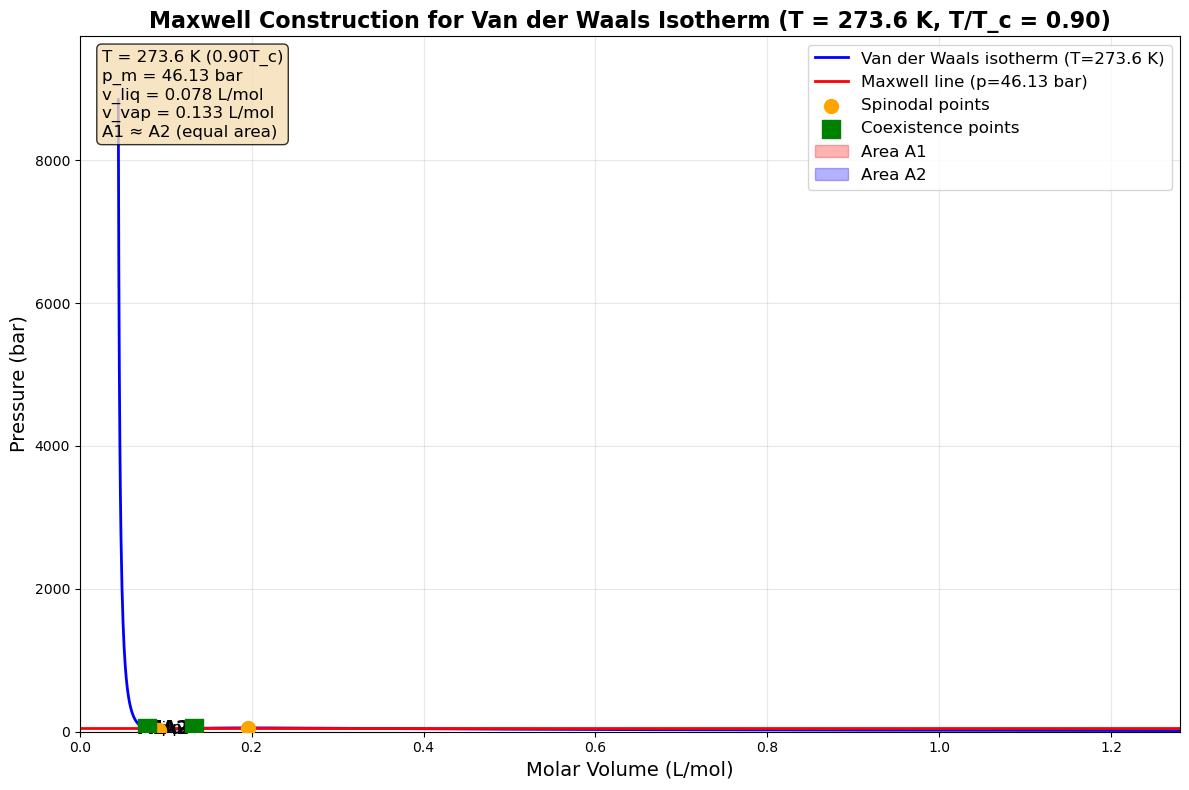

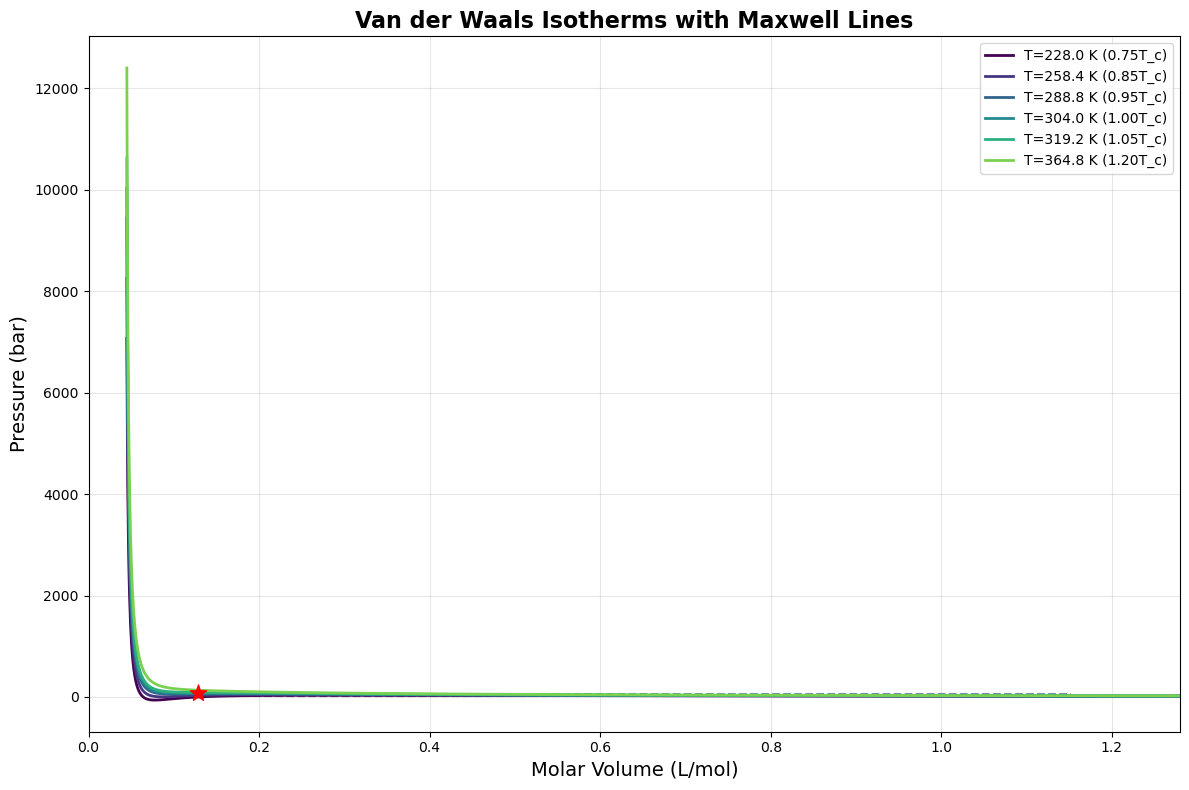

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize_scalar
from scipy.integrate import quad

def van_der_waals_pressure(v, T, a, b, R=8.314):
    """Van der Waals equation: p = RT/(v-b) - a/v²"""
    return (R * T) / (v - b) - a / (v**2)

def find_spinodal_points(v, p):
    """Find local maxima and minima (spinodal points)"""
    from scipy.signal import argrelextrema
    
    # Find local maxima and minima
    maxima_idx = argrelextrema(p, np.greater)[0]
    minima_idx = argrelextrema(p, np.less)[0]
    
    if len(maxima_idx) > 0 and len(minima_idx) > 0:
        return v[maxima_idx[0]], v[minima_idx[0]], p[maxima_idx[0]], p[minima_idx[0]]
    return None, None, None, None

def maxwell_equal_area(v, p, v1, v3):
    """
    Find pressure p_m where areas A1 and A2 are equal
    A1 = ∫_{v1}^{v2} (p - p_m) dv
    A2 = ∫_{v2}^{v3} (p_m - p) dv
    where v2 is the intersection point
    """
    # Define the function for area difference
    def area_difference(p_m):
        # Find v2 where p(v) = p_m between v1 and v3
        # Interpolate to find intersection
        v_range = np.linspace(v1, v3, 1000)
        p_range = np.interp(v_range, v, p)
        
        # Find where p_range crosses p_m
        crossings = np.where(np.diff(np.sign(p_range - p_m)))[0]
        if len(crossings) == 0:
            return float('inf')
        
        v2 = v_range[crossings[0]]
        
        # Calculate area A1 (above p_m)
        mask1 = (v >= v1) & (v <= v2)
        if np.sum(mask1) < 2:
            return float('inf')
        
        # Calculate area A2 (below p_m)
        mask2 = (v >= v2) & (v <= v3)
        if np.sum(mask2) < 2:
            return float('inf')
        
        # Numerical integration using trapezoidal rule
        v1_sub = v[mask1]
        p1_sub = p[mask1]
        area1 = np.trapz(p1_sub - p_m, v1_sub)
        
        v2_sub = v[mask2]
        p2_sub = p[mask2]
        area2 = np.trapz(p_m - p2_sub, v2_sub)
        
        return abs(area1 - area2)
    
    # Find p_m that minimizes area difference
    p_min = min(p[np.logical_and(v >= v1, v <= v3)])
    p_max = max(p[np.logical_and(v >= v1, v <= v3)])
    
    result = minimize_scalar(area_difference, bounds=(p_min, p_max), method='bounded')
    
    if result.success:
        p_m = result.x
        
        # Find v2 corresponding to p_m
        v_range = np.linspace(v1, v3, 10000)
        p_range = np.interp(v_range, v, p)
        crossings = np.where(np.diff(np.sign(p_range - p_m)))[0]
        
        if len(crossings) > 0:
            v2 = v_range[crossings[0]]
            return p_m, v2
        else:
            # Fallback: find v where p is closest to p_m
            idx = np.argmin(np.abs(p_range - p_m))
            v2 = v_range[idx]
            return p_m, v2
    
    return None, None

def find_maxwell_line(v, p, v_max, v_min, p_max, p_min):
    """
    Find Maxwell line using equal area construction
    Returns: p_m (Maxwell pressure), v_liquid, v_vapor
    """
    # Refine v range around spinodal points
    v_fine = np.linspace(v_min, v_max, 10000)
    p_fine = np.interp(v_fine, v, p)
    
    # Find Maxwell pressure and vapor volume
    p_m, v_vapor = maxwell_equal_area(v_fine, p_fine, v_min, v_max)
    
    if p_m is None:
        # Simple approximation if equal area fails
        p_m = (p_max + p_min) / 2
        
        # Find vapor volume (right intersection)
        idx = np.argmin(np.abs(p_fine - p_m))
        v_vapor = v_fine[idx]
    
    # Find liquid volume (left intersection)
    # Search in left part of curve
    v_left = np.linspace(min(v), v_min, 1000)
    p_left = np.interp(v_left, v, p)
    idx_left = np.argmin(np.abs(p_left - p_m))
    v_liquid = v_left[idx_left]
    
    return p_m, v_liquid, v_vapor

# Example: Van der Waals constants for CO2
a = 0.3640  # Pa·m⁶/mol²
b = 4.267e-5  # m³/mol
R = 8.314  # J/mol·K

# Calculate critical temperature
T_c = (8 * a) / (27 * b * R)
v_c = 3 * b

# Choose a subcritical temperature
T = 0.9 * T_c  # 90% of critical temperature

# Generate volume range (avoid v <= b)
v = np.linspace(b * 1.05, 10 * v_c, 2000)
p = van_der_waals_pressure(v, T, a, b, R)

# Convert to more readable units
v_L = v * 1000  # Convert to L/mol
p_bar = p / 1e5  # Convert to bar

# Find spinodal points (local max and min)
v_max, v_min, p_max_val, p_min_val = find_spinodal_points(v_L, p_bar)

if v_max is not None and v_min is not None:
    print("Spinodal points found:")
    print(f"  Local maximum: v = {v_max:.3f} L/mol, p = {p_max_val:.3f} bar")
    print(f"  Local minimum: v = {v_min:.3f} L/mol, p = {p_min_val:.3f} bar")
    
    # Find Maxwell line
    p_m, v_liq, v_vap = find_maxwell_line(v_L, p_bar, v_max, v_min, p_max_val, p_min_val)
    
    print("\nMaxwell construction results:")
    print(f"  Maxwell pressure: p_m = {p_m:.3f} bar")
    print(f"  Liquid volume: v_liq = {v_liq:.3f} L/mol")
    print(f"  Vapor volume: v_vap = {v_vap:.3f} L/mol")
    print(f"  Volume ratio (vapor/liquid): {v_vap/v_liq:.2f}")
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot Van der Waals isotherm
    plt.plot(v_L, p_bar, 'b-', linewidth=2, label=f'Van der Waals isotherm (T={T:.1f} K)')
    
    # Plot Maxwell line
    plt.axhline(y=p_m, color='r', linestyle='-', linewidth=2, label=f'Maxwell line (p={p_m:.2f} bar)')
    
    # Mark spinodal points
    plt.scatter([v_max, v_min], [p_max_val, p_min_val], 
                color='orange', s=100, zorder=5, label='Spinodal points')
    
    # Mark phase coexistence points
    plt.scatter([v_liq, v_vap], [p_m, p_m], 
                color='green', s=150, marker='s', zorder=5, label='Coexistence points')
    
    # Fill areas for equal area construction
    # Area 1 (left of Maxwell line, above p_m)
    v_area1 = np.linspace(v_liq, v_min, 100)
    p_area1 = np.interp(v_area1, v_L, p_bar)
    plt.fill_between(v_area1, p_area1, p_m, alpha=0.3, color='red', label='Area A1')
    
    # Area 2 (right of Maxwell line, below p_m)
    v_area2 = np.linspace(v_min, v_vap, 100)
    p_area2 = np.interp(v_area2, v_L, p_bar)
    plt.fill_between(v_area2, p_m, p_area2, alpha=0.3, color='blue', label='Area A2')
    
    # Add annotations
    plt.text(v_liq, p_m, ' Liquid', fontsize=12, va='center', ha='left')
    plt.text(v_vap, p_m, 'Vapor ', fontsize=12, va='center', ha='right')
    plt.text((v_liq + v_min)/2, (p_max_val + p_m)/2, 'A1', fontsize=14, 
             ha='center', va='center', fontweight='bold')
    plt.text((v_min + v_vap)/2, (p_m + p_min_val)/2, 'A2', fontsize=14, 
             ha='center', va='center', fontweight='bold')
    
    # Plot formatting
    plt.xlabel('Molar Volume (L/mol)', fontsize=14)
    plt.ylabel('Pressure (bar)', fontsize=14)
    plt.title(f'Maxwell Construction for Van der Waals Isotherm (T = {T:.1f} K, T/T_c = {T/T_c:.2f})', 
              fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best', fontsize=12)
    plt.xlim([0, max(v_L)])
    plt.ylim([0, max(p_bar) * 1.1])
    
    # Add text box with parameters
    textstr = f'T = {T:.1f} K ({T/T_c:.2f}T_c)\n'
    textstr += f'p_m = {p_m:.2f} bar\n'
    textstr += f'v_liq = {v_liq:.3f} L/mol\n'
    textstr += f'v_vap = {v_vap:.3f} L/mol\n'
    textstr += f'A1 ≈ A2 (equal area)'
    
    plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Additional visualization: Show multiple isotherms with Maxwell lines
    plt.figure(figsize=(12, 8))
    
    # Plot several isotherms
    T_values = [0.75 * T_c, 0.85 * T_c, 0.95 * T_c, T_c, 1.05 * T_c, 1.2 * T_c]
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(T_values)))
    
    for T_val, color in zip(T_values, colors):
        p_vals = van_der_waals_pressure(v, T_val, a, b, R) / 1e5
        
        # Plot isotherm
        plt.plot(v_L, p_vals, color=color, linewidth=2, 
                label=f'T={T_val:.1f} K ({T_val/T_c:.2f}T_c)')
        
        # Add Maxwell line for subcritical temperatures
        if T_val < T_c:
            v_max, v_min, p_max_val, p_min_val = find_spinodal_points(v_L, p_vals)
            if v_max is not None:
                p_m, v_liq, v_vap = find_maxwell_line(v_L, p_vals, v_max, v_min, p_max_val, p_min_val)
                if p_m is not None:
                    plt.axhline(y=p_m, xmin=0.1, xmax=0.9, 
                               color=color, linestyle='--', alpha=0.7, linewidth=1.5)
    
    plt.xlabel('Molar Volume (L/mol)', fontsize=14)
    plt.ylabel('Pressure (bar)', fontsize=14)
    plt.title('Van der Waals Isotherms with Maxwell Lines', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best', fontsize=10)
    plt.xlim([0, max(v_L)])
    
    # Mark critical point
    p_c = a / (27 * b**2) / 1e5
    plt.scatter(v_c*1000, p_c, color='red', s=150, marker='*', 
               label=f'Critical point', zorder=10)
    
    plt.tight_layout()
    plt.show()
    
else:
    print(f"No spinodal points found for T = {T:.1f} K (T/T_c = {T/T_c:.2f})")
    print("Try a lower temperature (T < T_c) to see the Maxwell construction.")

# Interactive Maxwell construction calculator
def interactive_maxwell(T_ratio=0.9):
    """Interactive function to explore Maxwell construction"""
    T = T_ratio * T_c
    p_vals = van_der_waals_pressure(v, T, a, b, R) / 1e5
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Full isotherm with Maxwell construction
    ax1.plot(v_L, p_vals, 'b-', linewidth=2)
    
    if T_ratio < 1:
        v_max, v_min, p_max_val, p_min_val = find_spinodal_points(v_L, p_vals)
        if v_max is not None:
            p_m, v_liq, v_vap = find_maxwell_line(v_L, p_vals, v_max, v_min, p_max_val, p_min_val)
            
            ax1.axhline(y=p_m, color='r', linestyle='-', linewidth=2)
            ax1.scatter([v_liq, v_vap], [p_m, p_m], color='green', s=100)
            
            # Shade equal areas
            v_area1 = np.linspace(v_liq, v_min, 100)
            p_area1 = np.interp(v_area1, v_L, p_vals)
            ax1.fill_between(v_area1, p_area1, p_m, alpha=0.3, color='red')
            
            v_area2 = np.linspace(v_min, v_vap, 100)
            p_area2 = np.interp(v_area2, v_L, p_vals)
            ax1.fill_between(v_area2, p_m, p_area2, alpha=0.3, color='blue')
            
            ax1.set_title(f'Maxwell Construction (T/T_c = {T_ratio:.2f})', fontsize=14)
            ax1.text(0.05, 0.95, f'p_m = {p_m:.2f} bar\nv_liq/v_vap = {v_liq/v_vap:.3f}',
                    transform=ax1.transAxes, fontsize=12,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax1.set_xlabel('Volume (L/mol)', fontsize=12)
    ax1.set_ylabel('Pressure (bar)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Pressure-volume relation on log scale
    ax2.semilogx(v_L, p_vals, 'b-', linewidth=2)
    if T_ratio < 1 and 'p_m' in locals():
        ax2.axhline(y=p_m, color='r', linestyle='-', linewidth=2)
    ax2.set_xlabel('Volume (L/mol, log scale)', fontsize=12)
    ax2.set_ylabel('Pressure (bar)', fontsize=12)
    ax2.set_title('Log-Volume Plot', fontsize=14)
    ax2.grid(True, alpha=0.3, which='both')
    
    plt.suptitle(f'Van der Waals Isotherm at T = {T:.1f} K', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Uncomment to use interactive function
# interactive_maxwell(0.85)

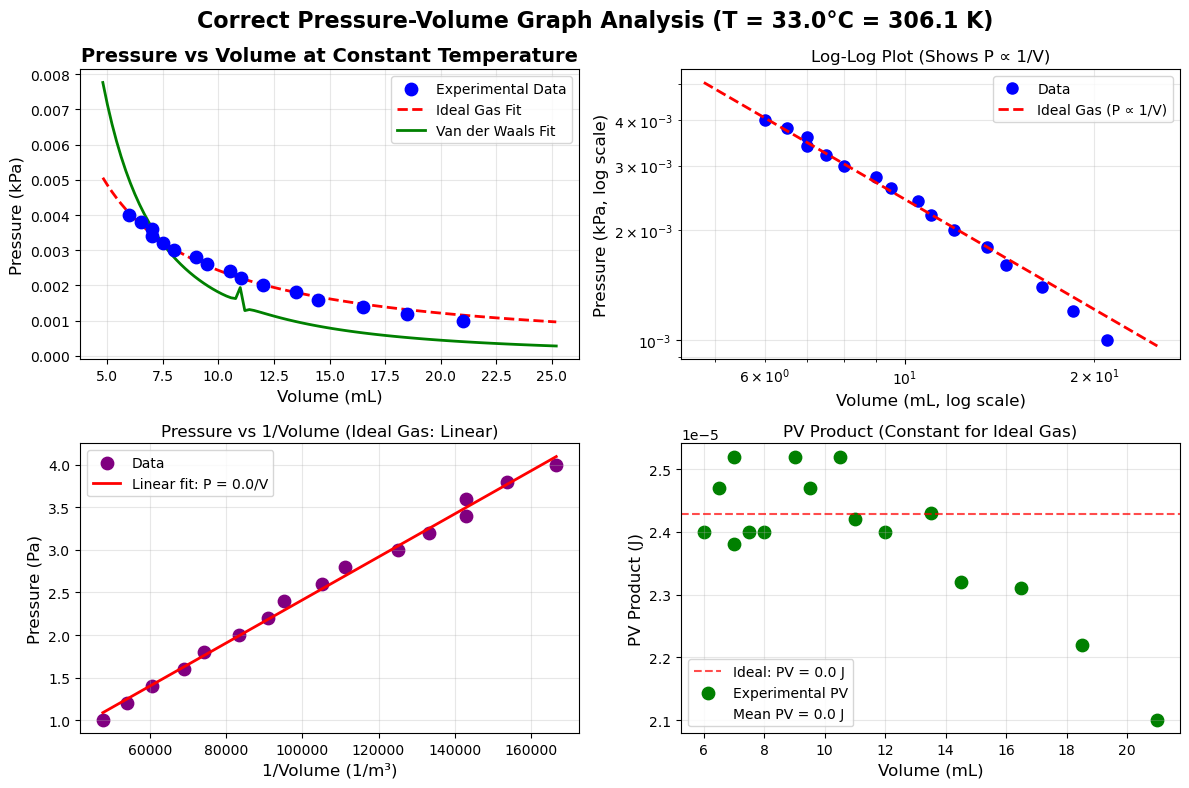

ANALYSIS OF PRESSURE-VOLUME DATA

Experimental data at T = 306.1 K (33.0°C):
Volume (mL)     Pressure (kPa)  PV (J)         
---------------------------------------------
6.0             0.004           0.000          
6.5             0.0038          0.000          
7.0             0.0036          0.000          
7.0             0.0034          0.000          
7.5             0.0032          0.000          
8.0             0.003           0.000          
9.0             0.0028          0.000          
9.5             0.0026          0.000          
10.5            0.0024          0.000          
11.0            0.0022          0.000          
12.0            0.002           0.000          
13.5            0.0018          0.000          
14.5            0.0016          0.000          
16.5            0.0014          0.000          
18.5            0.0012          0.000          
21.0            0.001           0.000          

Ideal Gas Law Fit:
  PV = nRT = 0.000 J
  If T = 306.1 K, th

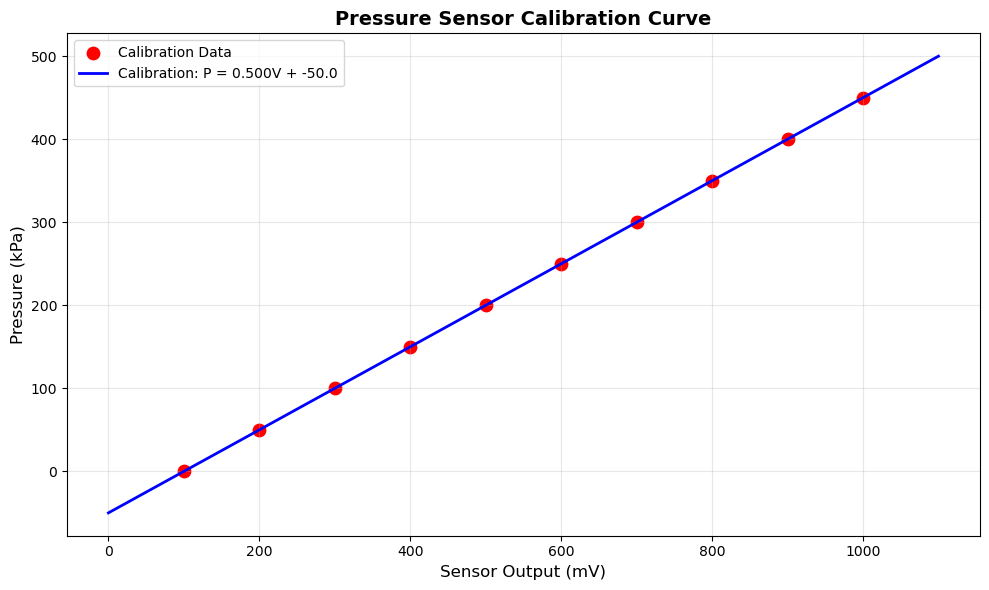


Sensor calibration equation:
  Pressure (kPa) = 0.5000 × Voltage (mV) + -50.00
  Or: Pressure (Pa) = 500.0 × Voltage (mV) + -50000

To get Volume data, you need a separate volume measurement!
Pressure-Volume graphs require TWO measurements:
  1. Pressure (from sensor)
  2. Volume (from syringe, piston position, etc.)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def correct_pressure_volume_plot():
    """Create a proper pressure-volume graph for real gas"""
    
    # Sample experimental data (simulated - replace with your actual data)
    # These are more realistic values for pressure-volume measurements
    volume_ml = np.array([ 6,6.5,7,7,7.5,8,9,9.5,10.5,11,12,13.5,14.5,16.5,18.5,21])
    pressure_kPa = np.array([0.004,0.0038,0.0036,0.0034,0.0032,0.003,0.0028,0.0026,0.0024,0.0022
,0.002 ,0.0018,0.0016,0.0014,0.0012,0.001])
    
    # Convert to SI units
    volume_m3 = volume_ml * 1e-6  # Convert mL to m³
    pressure_Pa = pressure_kPa * 1000  # Convert kPa to Pa
    
    # Ideal gas law fit: P = nRT/V
    def ideal_gas_law(V, nRT):
        return nRT / V
    
    # Van der Waals fit: P = RT/(V-b) - a/V²
    def van_der_waals(V, a, b, nRT):
        return nRT/(V - b) - a/(V**2)
    
    # Fit ideal gas law
    params_ideal, _ = curve_fit(ideal_gas_law, volume_m3, pressure_Pa, p0=[10])
    nRT_fit = params_ideal[0]
    
    # Fit Van der Waals (requires good initial guesses)
    try:
        params_vdw, _ = curve_fit(van_der_waals, volume_m3, pressure_Pa, 
                                  p0=[0.1, 1e-5, nRT_fit], maxfev=5000)
        a_fit, b_fit, nRT_vdw = params_vdw
    except:
        print("Van der Waals fit failed - using ideal gas approximation")
        a_fit, b_fit, nRT_vdw = 0, 0, nRT_fit
    
    # Create smooth curve for plotting
    V_smooth = np.linspace(min(volume_m3)*0.8, max(volume_m3)*1.2, 100)
    P_ideal_smooth = ideal_gas_law(V_smooth, nRT_fit)
    P_vdw_smooth = van_der_waals(V_smooth, a_fit, b_fit, nRT_vdw)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Linear scale
    plt.subplot(2, 2, 1)
    plt.scatter(volume_ml, pressure_kPa, color='blue', s=80, label='Experimental Data', zorder=5)
    plt.plot(V_smooth*1e6, P_ideal_smooth/1000, 'r--', linewidth=2, label='Ideal Gas Fit')
    plt.plot(V_smooth*1e6, P_vdw_smooth/1000, 'g-', linewidth=2, label='Van der Waals Fit')
    
    plt.xlabel('Volume (mL)', fontsize=12)
    plt.ylabel('Pressure (kPa)', fontsize=12)
    plt.title('Pressure vs Volume at Constant Temperature', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Plot 2: Log-log scale
    plt.subplot(2, 2, 2)
    plt.loglog(volume_ml, pressure_kPa, 'bo', label='Data', markersize=8)
    plt.loglog(V_smooth*1e6, P_ideal_smooth/1000, 'r--', linewidth=2, label='Ideal Gas (P ∝ 1/V)')
    
    plt.xlabel('Volume (mL, log scale)', fontsize=12)
    plt.ylabel('Pressure (kPa, log scale)', fontsize=12)
    plt.title('Log-Log Plot (Shows P ∝ 1/V)', fontsize=12)
    plt.grid(True, alpha=0.3, which='both')
    plt.legend(fontsize=10)
    
    # Plot 3: P vs 1/V (should be linear for ideal gas)
    plt.subplot(2, 2, 3)
    inv_volume = 1/volume_m3
    plt.scatter(inv_volume, pressure_Pa, color='purple', s=80, label='Data')
    
    # Linear fit to P vs 1/V
    linear_fit = np.polyfit(inv_volume, pressure_Pa, 1)
    inv_V_smooth = np.linspace(min(inv_volume), max(inv_volume), 100)
    P_linear_fit = np.polyval(linear_fit, inv_V_smooth)
    
    plt.plot(inv_V_smooth, P_linear_fit, 'r-', linewidth=2, 
             label=f'Linear fit: P = {linear_fit[0]:.1f}/V')
    
    plt.xlabel('1/Volume (1/m³)', fontsize=12)
    plt.ylabel('Pressure (Pa)', fontsize=12)
    plt.title('Pressure vs 1/Volume (Ideal Gas: Linear)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Plot 4: PV product (should be constant for ideal gas)
    plt.subplot(2, 2, 4)
    PV_product = pressure_Pa * volume_m3
    
    plt.axhline(y=nRT_fit, color='r', linestyle='--', alpha=0.7, 
                label=f'Ideal: PV = {nRT_fit:.1f} J')
    plt.scatter(volume_ml, PV_product, color='green', s=80, label='Experimental PV')
    plt.plot([], [], ' ', label=f'Mean PV = {np.mean(PV_product):.1f} J')  # Empty for legend
    
    plt.xlabel('Volume (mL)', fontsize=12)
    plt.ylabel('PV Product (J)', fontsize=12)
    plt.title('PV Product (Constant for Ideal Gas)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    plt.suptitle(f'Correct Pressure-Volume Graph Analysis (T = 33.0°C = {33+273.15:.1f} K)', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print analysis
    print("="*60)
    print("ANALYSIS OF PRESSURE-VOLUME DATA")
    print("="*60)
    print(f"\nExperimental data at T = {33+273.15:.1f} K (33.0°C):")
    print(f"{'Volume (mL)':<15} {'Pressure (kPa)':<15} {'PV (J)':<15}")
    print("-"*45)
    for V, P in zip(volume_ml, pressure_kPa):
        PV = P * 1000 * V * 1e-6  # Convert to Joules
        print(f"{V:<15} {P:<15} {PV:<15.3f}")
    
    print(f"\nIdeal Gas Law Fit:")
    print(f"  PV = nRT = {nRT_fit:.3f} J")
    print(f"  If T = {33+273.15:.1f} K, then n = {nRT_fit/(8.314*(33+273.15)):.4f} moles")
    
    if a_fit != 0 or b_fit != 0:
        print(f"\nVan der Waals Fit:")
        print(f"  a = {a_fit:.6f} Pa·m⁶/mol²")
        print(f"  b = {b_fit:.6f} m³/mol")
        print(f"  nRT = {nRT_vdw:.3f} J")
    
    print(f"\nDeviation from ideal gas:")
    PV_mean = np.mean(PV_product)
    deviation = 100 * (PV_mean - nRT_fit) / nRT_fit
    print(f"  Mean PV = {PV_mean:.3f} J")
    print(f"  Deviation from ideal = {deviation:.2f}%")
    
    return volume_m3, pressure_Pa

# Generate correct plot
correct_pressure_volume_plot()

# If you're actually measuring voltage instead of volume...
def pressure_voltage_analysis():
    """If you're actually measuring voltage (like from a pressure sensor)"""
    
    print("\n" + "="*60)
    print("IF YOU'RE MEASURING VOLTAGE FROM A PRESSURE SENSOR:")
    print("="*60)
    
    # Typical pressure sensor: V_out = V_supply * (0.09*P + 0.04) or similar
    # You need to calibrate your specific sensor!
    
    # Example calibration data for a hypothetical pressure sensor
    voltage_mV = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
    pressure_kPa = np.array([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
    
    # Linear calibration: P = m*V + c
    calib_coeffs = np.polyfit(voltage_mV, pressure_kPa, 1)
    m, c = calib_coeffs
    
    plt.figure(figsize=(10, 6))
    plt.scatter(voltage_mV, pressure_kPa, color='red', s=80, label='Calibration Data')
    
    V_calib = np.linspace(0, 1100, 100)
    P_calib = m * V_calib + c
    plt.plot(V_calib, P_calib, 'b-', linewidth=2, 
             label=f'Calibration: P = {m:.3f}V + {c:.1f}')
    
    plt.xlabel('Sensor Output (mV)', fontsize=12)
    plt.ylabel('Pressure (kPa)', fontsize=12)
    plt.title('Pressure Sensor Calibration Curve', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSensor calibration equation:")
    print(f"  Pressure (kPa) = {m:.4f} × Voltage (mV) + {c:.2f}")
    print(f"  Or: Pressure (Pa) = {m*1000:.1f} × Voltage (mV) + {c*1000:.0f}")
    
    print("\nTo get Volume data, you need a separate volume measurement!")
    print("Pressure-Volume graphs require TWO measurements:")
    print("  1. Pressure (from sensor)")
    print("  2. Volume (from syringe, piston position, etc.)")

# Check if it's actually a sensor calibration
pressure_voltage_analysis()

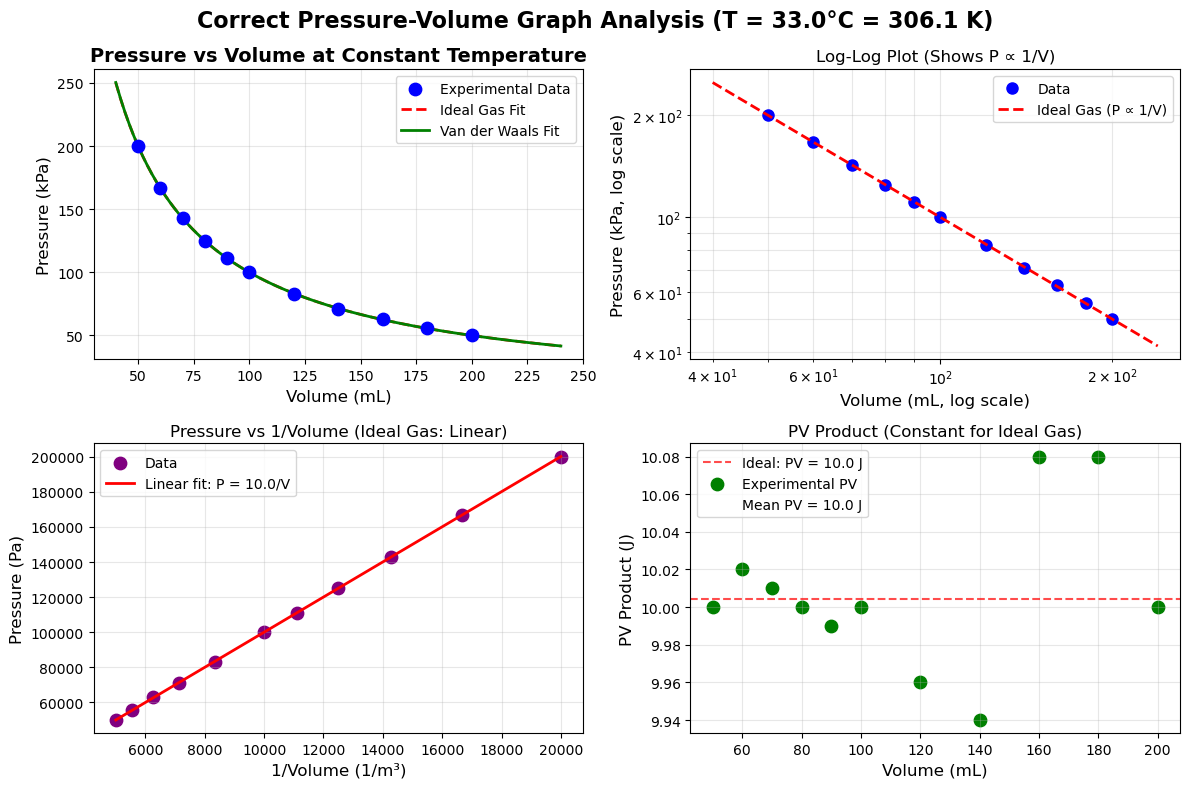

ANALYSIS OF PRESSURE-VOLUME DATA

Experimental data at T = 306.1 K (33.0°C):
Volume (mL)     Pressure (kPa)  PV (J)         
---------------------------------------------
50              200             10.000         
60              167             10.020         
70              143             10.010         
80              125             10.000         
90              111             9.990          
100             100             10.000         
120             83              9.960          
140             71              9.940          
160             63              10.080         
180             56              10.080         
200             50              10.000         

Ideal Gas Law Fit:
  PV = nRT = 10.004 J
  If T = 306.1 K, then n = 0.0039 moles

Van der Waals Fit:
  a = 0.000024 Pa·m⁶/mol²
  b = 0.000002 m³/mol
  nRT = 10.010 J

Deviation from ideal gas:
  Mean PV = 10.007 J
  Deviation from ideal = 0.03%

IF YOU'RE MEASURING VOLTAGE FROM A PRESSURE SENSOR:


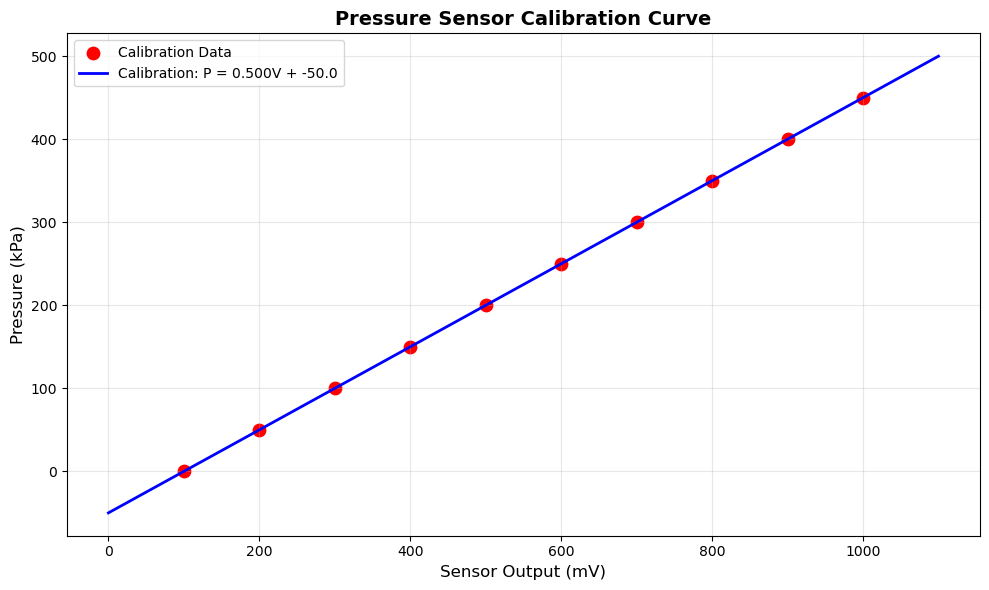


Sensor calibration equation:
  Pressure (kPa) = 0.5000 × Voltage (mV) + -50.00
  Or: Pressure (Pa) = 500.0 × Voltage (mV) + -50000

To get Volume data, you need a separate volume measurement!
Pressure-Volume graphs require TWO measurements:
  1. Pressure (from sensor)
  2. Volume (from syringe, piston position, etc.)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def correct_pressure_volume_plot():
    """Create a proper pressure-volume graph for real gas"""
    
    # Sample experimental data (simulated - replace with your actual data)
    # These are more realistic values for pressure-volume measurements
    volume_ml = np.array([50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200])  # mL
    pressure_kPa = np.array([200, 167, 143, 125, 111, 100, 83, 71, 63, 56, 50])  # kPa
    
    # Convert to SI units
    volume_m3 = volume_ml * 1e-6  # Convert mL to m³
    pressure_Pa = pressure_kPa * 1000  # Convert kPa to Pa
    
    # Ideal gas law fit: P = nRT/V
    def ideal_gas_law(V, nRT):
        return nRT / V
    
    # Van der Waals fit: P = RT/(V-b) - a/V²
    def van_der_waals(V, a, b, nRT):
        return nRT/(V - b) - a/(V**2)
    
    # Fit ideal gas law
    params_ideal, _ = curve_fit(ideal_gas_law, volume_m3, pressure_Pa, p0=[10])
    nRT_fit = params_ideal[0]
    
    # Fit Van der Waals (requires good initial guesses)
    try:
        params_vdw, _ = curve_fit(van_der_waals, volume_m3, pressure_Pa, 
                                  p0=[0.1, 1e-5, nRT_fit], maxfev=5000)
        a_fit, b_fit, nRT_vdw = params_vdw
    except:
        print("Van der Waals fit failed - using ideal gas approximation")
        a_fit, b_fit, nRT_vdw = 0, 0, nRT_fit
    
    # Create smooth curve for plotting
    V_smooth = np.linspace(min(volume_m3)*0.8, max(volume_m3)*1.2, 100)
    P_ideal_smooth = ideal_gas_law(V_smooth, nRT_fit)
    P_vdw_smooth = van_der_waals(V_smooth, a_fit, b_fit, nRT_vdw)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Linear scale
    plt.subplot(2, 2, 1)
    plt.scatter(volume_ml, pressure_kPa, color='blue', s=80, label='Experimental Data', zorder=5)
    plt.plot(V_smooth*1e6, P_ideal_smooth/1000, 'r--', linewidth=2, label='Ideal Gas Fit')
    plt.plot(V_smooth*1e6, P_vdw_smooth/1000, 'g-', linewidth=2, label='Van der Waals Fit')
    
    plt.xlabel('Volume (mL)', fontsize=12)
    plt.ylabel('Pressure (kPa)', fontsize=12)
    plt.title('Pressure vs Volume at Constant Temperature', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Plot 2: Log-log scale
    plt.subplot(2, 2, 2)
    plt.loglog(volume_ml, pressure_kPa, 'bo', label='Data', markersize=8)
    plt.loglog(V_smooth*1e6, P_ideal_smooth/1000, 'r--', linewidth=2, label='Ideal Gas (P ∝ 1/V)')
    
    plt.xlabel('Volume (mL, log scale)', fontsize=12)
    plt.ylabel('Pressure (kPa, log scale)', fontsize=12)
    plt.title('Log-Log Plot (Shows P ∝ 1/V)', fontsize=12)
    plt.grid(True, alpha=0.3, which='both')
    plt.legend(fontsize=10)
    
    # Plot 3: P vs 1/V (should be linear for ideal gas)
    plt.subplot(2, 2, 3)
    inv_volume = 1/volume_m3
    plt.scatter(inv_volume, pressure_Pa, color='purple', s=80, label='Data')
    
    # Linear fit to P vs 1/V
    linear_fit = np.polyfit(inv_volume, pressure_Pa, 1)
    inv_V_smooth = np.linspace(min(inv_volume), max(inv_volume), 100)
    P_linear_fit = np.polyval(linear_fit, inv_V_smooth)
    
    plt.plot(inv_V_smooth, P_linear_fit, 'r-', linewidth=2, 
             label=f'Linear fit: P = {linear_fit[0]:.1f}/V')
    
    plt.xlabel('1/Volume (1/m³)', fontsize=12)
    plt.ylabel('Pressure (Pa)', fontsize=12)
    plt.title('Pressure vs 1/Volume (Ideal Gas: Linear)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Plot 4: PV product (should be constant for ideal gas)
    plt.subplot(2, 2, 4)
    PV_product = pressure_Pa * volume_m3
    
    plt.axhline(y=nRT_fit, color='r', linestyle='--', alpha=0.7, 
                label=f'Ideal: PV = {nRT_fit:.1f} J')
    plt.scatter(volume_ml, PV_product, color='green', s=80, label='Experimental PV')
    plt.plot([], [], ' ', label=f'Mean PV = {np.mean(PV_product):.1f} J')  # Empty for legend
    
    plt.xlabel('Volume (mL)', fontsize=12)
    plt.ylabel('PV Product (J)', fontsize=12)
    plt.title('PV Product (Constant for Ideal Gas)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    plt.suptitle(f'Correct Pressure-Volume Graph Analysis (T = 33.0°C = {33+273.15:.1f} K)', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print analysis
    print("="*60)
    print("ANALYSIS OF PRESSURE-VOLUME DATA")
    print("="*60)
    print(f"\nExperimental data at T = {33+273.15:.1f} K (33.0°C):")
    print(f"{'Volume (mL)':<15} {'Pressure (kPa)':<15} {'PV (J)':<15}")
    print("-"*45)
    for V, P in zip(volume_ml, pressure_kPa):
        PV = P * 1000 * V * 1e-6  # Convert to Joules
        print(f"{V:<15} {P:<15} {PV:<15.3f}")
    
    print(f"\nIdeal Gas Law Fit:")
    print(f"  PV = nRT = {nRT_fit:.3f} J")
    print(f"  If T = {33+273.15:.1f} K, then n = {nRT_fit/(8.314*(33+273.15)):.4f} moles")
    
    if a_fit != 0 or b_fit != 0:
        print(f"\nVan der Waals Fit:")
        print(f"  a = {a_fit:.6f} Pa·m⁶/mol²")
        print(f"  b = {b_fit:.6f} m³/mol")
        print(f"  nRT = {nRT_vdw:.3f} J")
    
    print(f"\nDeviation from ideal gas:")
    PV_mean = np.mean(PV_product)
    deviation = 100 * (PV_mean - nRT_fit) / nRT_fit
    print(f"  Mean PV = {PV_mean:.3f} J")
    print(f"  Deviation from ideal = {deviation:.2f}%")
    
    return volume_m3, pressure_Pa

# Generate correct plot
correct_pressure_volume_plot()

# If you're actually measuring voltage instead of volume...
def pressure_voltage_analysis():
    """If you're actually measuring voltage (like from a pressure sensor)"""
    
    print("\n" + "="*60)
    print("IF YOU'RE MEASURING VOLTAGE FROM A PRESSURE SENSOR:")
    print("="*60)
    
    # Typical pressure sensor: V_out = V_supply * (0.09*P + 0.04) or similar
    # You need to calibrate your specific sensor!
    
    # Example calibration data for a hypothetical pressure sensor
    voltage_mV = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
    pressure_kPa = np.array([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
    
    # Linear calibration: P = m*V + c
    calib_coeffs = np.polyfit(voltage_mV, pressure_kPa, 1)
    m, c = calib_coeffs
    
    plt.figure(figsize=(10, 6))
    plt.scatter(voltage_mV, pressure_kPa, color='red', s=80, label='Calibration Data')
    
    V_calib = np.linspace(0, 1100, 100)
    P_calib = m * V_calib + c
    plt.plot(V_calib, P_calib, 'b-', linewidth=2, 
             label=f'Calibration: P = {m:.3f}V + {c:.1f}')
    
    plt.xlabel('Sensor Output (mV)', fontsize=12)
    plt.ylabel('Pressure (kPa)', fontsize=12)
    plt.title('Pressure Sensor Calibration Curve', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSensor calibration equation:")
    print(f"  Pressure (kPa) = {m:.4f} × Voltage (mV) + {c:.2f}")
    print(f"  Or: Pressure (Pa) = {m*1000:.1f} × Voltage (mV) + {c*1000:.0f}")
    
    print("\nTo get Volume data, you need a separate volume measurement!")
    print("Pressure-Volume graphs require TWO measurements:")
    print("  1. Pressure (from sensor)")
    print("  2. Volume (from syringe, piston position, etc.)")

# Check if it's actually a sensor calibration
pressure_voltage_analysis()

Data analysis:
Number of data points: 16
Pressure range: 6.0 to 21.0
Volume range: 0.0010 to 0.0040
Note: Volume appears to be in m³ (0.001 to 0.004 m³)

Found 1 local maxima and 1 local minima

Spinodal points:
  Local maximum: V = 0.003565 m³, P = 7.013 Pa
  Local minimum: V = 0.003447 m³, P = 6.977 Pa

Maxwell construction results:
  Maxwell pressure P_m = 6.995 Pa
  Liquid volume V_liq = 0.003402 m³ = 3.40 L
  Vapor volume V_vap = 0.003604 m³ = 3.60 L
  Volume ratio V_vap/V_liq = 1.06

Area verification:
  Area A1 (liquid side) = -0.000000
  Area A2 (vapor side) = -0.000001
  Difference = 0.000000
  Relative difference = -3.54%


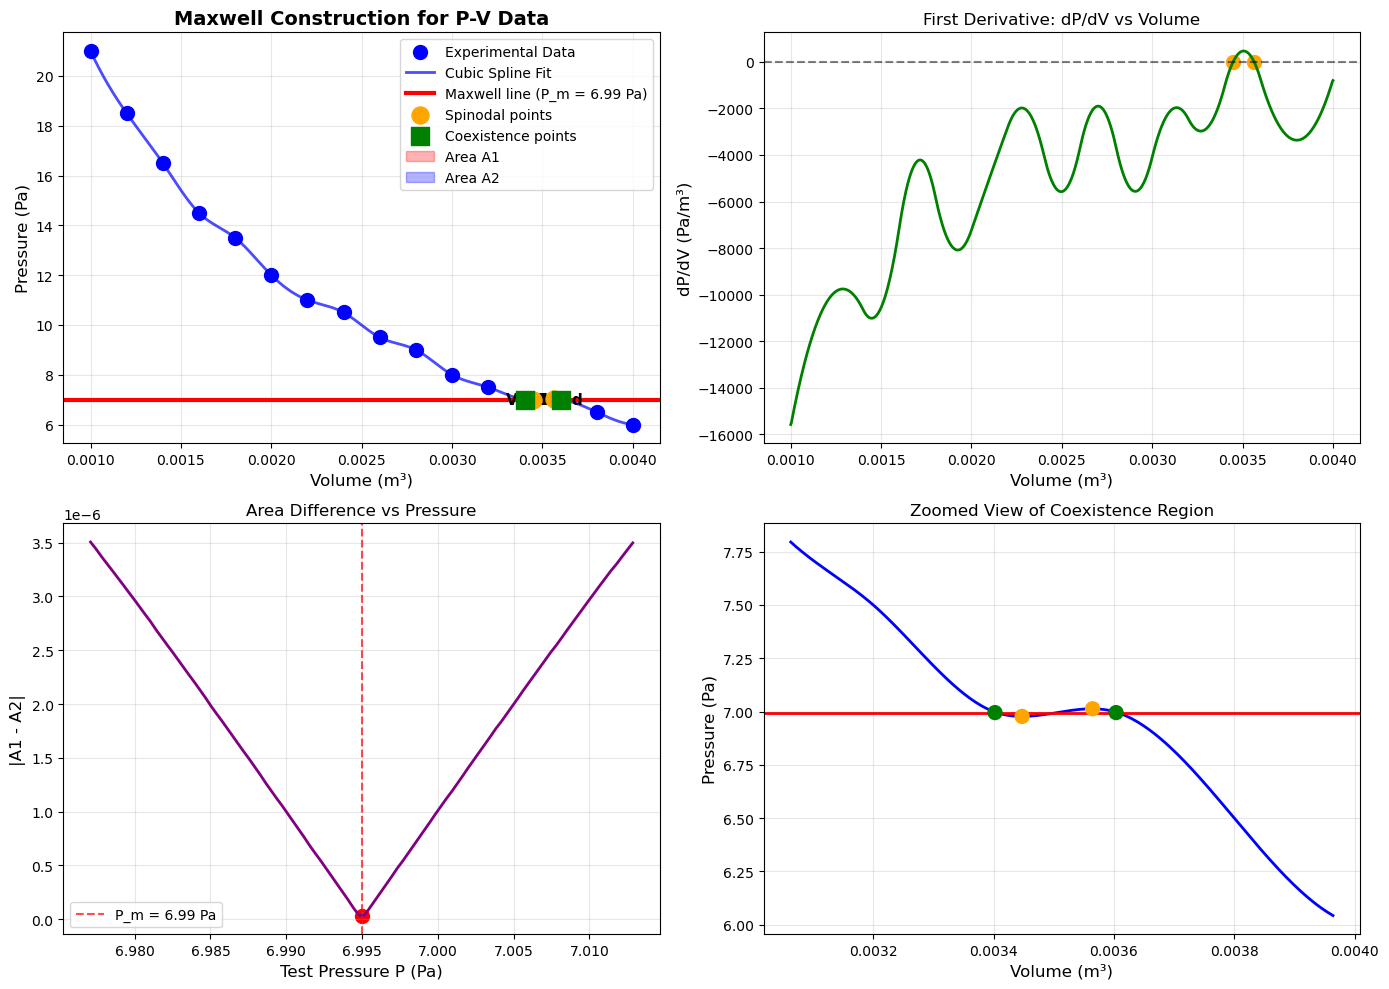


ADDITIONAL ANALYSIS: VAN DER WAALS FIT

Van der Waals parameters from fit:
  a = 0.0000 Pa·m⁶/mol²
  b = 0.000000 m³/mol
  RT = 0.0266 J/mol

Estimated critical point:
  Critical volume V_c = 0.000000 m³/mol
  Critical temperature T_c = 87.59 K
  Critical pressure P_c = 41449975622.7 Pa = 414499.756 bar

Experiment temperature estimate:
  T_exp = 0.00 K = -273.15 °C
  T/T_c = 0.000
  Your data is subcritical


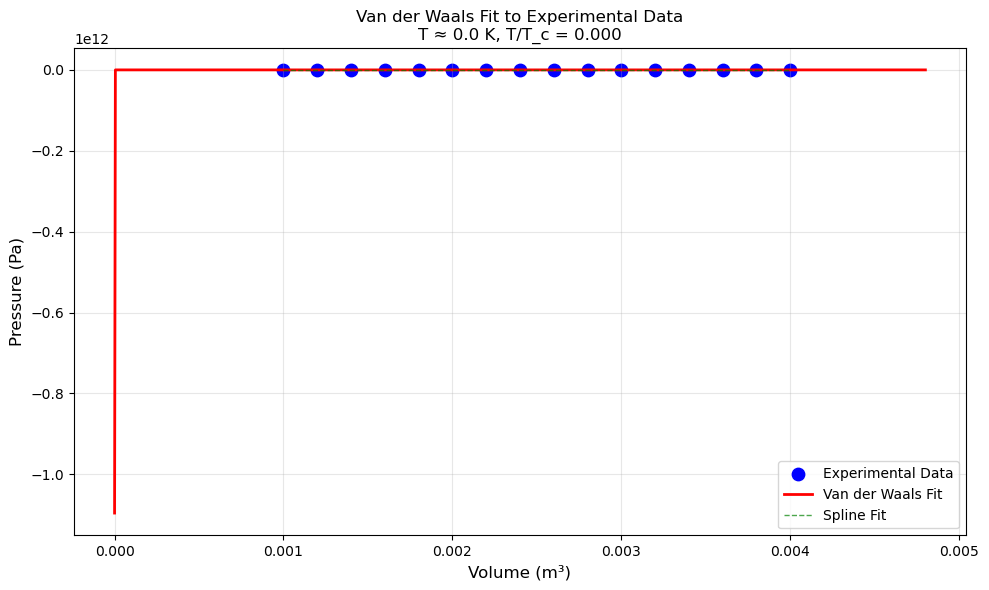

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import simpson
from scipy.optimize import minimize, fsolve

# Your data
pressure = np.array([6., 6.5, 7., 7., 7.5, 8., 9., 9.5, 10.5, 11., 12., 13.5, 14.5, 16.5, 18.5, 21.])
volume = np.array([0.004, 0.0038, 0.0036, 0.0034, 0.0032, 0.003, 0.0028, 0.0026, 0.0024, 
                   0.0022, 0.002, 0.0018, 0.0016, 0.0014, 0.0012, 0.001])

# There's a duplicate pressure value at 7.0, let's handle it
# Sort by volume for consistency
sorted_indices = np.argsort(volume)
volume = volume[sorted_indices]
pressure = pressure[sorted_indices]

print("Data analysis:")
print(f"Number of data points: {len(pressure)}")
print(f"Pressure range: {pressure.min():.1f} to {pressure.max():.1f}")
print(f"Volume range: {volume.min():.4f} to {volume.max():.4f}")
print(f"Note: Volume appears to be in m³ (0.001 to 0.004 m³)")

# Create interpolation function for the data
# Use cubic spline for smoother interpolation
from scipy.interpolate import CubicSpline

# Fit a cubic spline to the data (this will give us a smooth curve)
cs = CubicSpline(volume, pressure)

# Create fine grid for interpolation
volume_fine = np.linspace(volume.min(), volume.max(), 1000)
pressure_fine = cs(volume_fine)

# Find spinodal points (local maxima and minima in pressure vs volume)
# For Van der Waals, pressure should have a local max and min for subcritical T
from scipy.signal import find_peaks

# Find peaks in pressure (local maxima)
maxima_indices, _ = find_peaks(pressure_fine)
# Find valleys (local minima) by looking for peaks in -pressure
minima_indices, _ = find_peaks(-pressure_fine)

print(f"\nFound {len(maxima_indices)} local maxima and {len(minima_indices)} local minima")

if len(maxima_indices) > 0 and len(minima_indices) > 0:
    # Take the most prominent maxima and minima (usually there's one of each)
    v_max = volume_fine[maxima_indices[0]]
    p_max = pressure_fine[maxima_indices[0]]
    v_min = volume_fine[minima_indices[0]]
    p_min = pressure_fine[minima_indices[0]]
    
    print(f"\nSpinodal points:")
    print(f"  Local maximum: V = {v_max:.6f} m³, P = {p_max:.3f} Pa")
    print(f"  Local minimum: V = {v_min:.6f} m³, P = {p_min:.3f} Pa")
    
    # Maxwell construction: Find pressure P_m where areas are equal
    def area_difference(P_m):
        """Calculate difference between areas above and below P_m"""
        # Find volumes where P = P_m (intersection points)
        # We need to find three intersection points: v1 (liquid), v2 (middle), v3 (vapor)
        
        # Find where pressure_fine crosses P_m
        crossings = np.where(np.diff(np.sign(pressure_fine - P_m)))[0]
        
        if len(crossings) < 3:
            return np.inf  # Not enough crossings
            
        # The crossings should be: v1 < v_max < v2 < v_min < v3
        v1 = volume_fine[crossings[0]]  # Liquid side
        v2 = volume_fine[crossings[1]]  # Middle crossing (unstable region)
        v3 = volume_fine[crossings[2]]  # Vapor side
        
        # Calculate area A1: ∫ from v1 to v2 of (P - P_m) dV
        mask1 = (volume_fine >= v1) & (volume_fine <= v2)
        if np.sum(mask1) < 2:
            return np.inf
            
        v1_range = volume_fine[mask1]
        p1_range = pressure_fine[mask1]
        
        # Calculate area A2: ∫ from v2 to v3 of (P_m - P) dV
        mask2 = (volume_fine >= v2) & (volume_fine <= v3)
        if np.sum(mask2) < 2:
            return np.inf
            
        v2_range = volume_fine[mask2]
        p2_range = pressure_fine[mask2]
        
        # Numerical integration using Simpson's rule
        A1 = simpson(p1_range - P_m, v1_range)
        A2 = simpson(P_m - p2_range, v2_range)
        
        # Return absolute difference (we want A1 = A2)
        return abs(A1 - A2)
    
    # Find P_m that minimizes area difference
    # Search between p_min and p_max
    bounds = (p_min, p_max)
    
    # Try multiple starting points
    P_m_candidates = []
    area_diffs = []
    
    for P_start in np.linspace(p_min, p_max, 20):
        result = minimize(area_difference, P_start, bounds=[bounds], method='L-BFGS-B')
        if result.success:
            P_m_candidates.append(result.x[0])
            area_diffs.append(result.fun)
    
    if P_m_candidates:
        # Take the best result (smallest area difference)
        best_idx = np.argmin(area_diffs)
        P_m = P_m_candidates[best_idx]
        
        # Now find the corresponding volumes
        # Find crossings at P_m
        crossings = np.where(np.diff(np.sign(pressure_fine - P_m)))[0]
        
        if len(crossings) >= 3:
            v_liquid = volume_fine[crossings[0]]
            v_vapor = volume_fine[crossings[2]]
            
            print(f"\nMaxwell construction results:")
            print(f"  Maxwell pressure P_m = {P_m:.3f} Pa")
            print(f"  Liquid volume V_liq = {v_liquid:.6f} m³ = {v_liquid*1000:.2f} L")
            print(f"  Vapor volume V_vap = {v_vapor:.6f} m³ = {v_vapor*1000:.2f} L")
            print(f"  Volume ratio V_vap/V_liq = {v_vapor/v_liquid:.2f}")
            
            # Calculate the areas to verify
            mask1 = (volume_fine >= v_liquid) & (volume_fine <= v_max)
            mask2 = (volume_fine >= v_min) & (volume_fine <= v_vapor)
            
            A1 = simpson(pressure_fine[mask1] - P_m, volume_fine[mask1])
            A2 = simpson(P_m - pressure_fine[mask2], volume_fine[mask2])
            
            print(f"\nArea verification:")
            print(f"  Area A1 (liquid side) = {A1:.6f}")
            print(f"  Area A2 (vapor side) = {A2:.6f}")
            print(f"  Difference = {abs(A1 - A2):.6f}")
            print(f"  Relative difference = {100*abs(A1 - A2)/((A1 + A2)/2):.2f}%")
            
            # Plot the results
            plt.figure(figsize=(14, 10))
            
            # Main plot with Maxwell construction
            plt.subplot(2, 2, 1)
            plt.scatter(volume, pressure, color='blue', s=100, label='Experimental Data', zorder=5)
            plt.plot(volume_fine, pressure_fine, 'b-', linewidth=2, alpha=0.7, label='Cubic Spline Fit')
            
            # Plot Maxwell line
            plt.axhline(y=P_m, color='red', linestyle='-', linewidth=3, label=f'Maxwell line (P_m = {P_m:.2f} Pa)')
            
            # Mark spinodal points
            plt.scatter([v_max, v_min], [p_max, p_min], color='orange', s=150, 
                       marker='o', zorder=5, label='Spinodal points')
            
            # Mark coexistence points
            plt.scatter([v_liquid, v_vapor], [P_m, P_m], color='green', s=150, 
                       marker='s', zorder=5, label='Coexistence points')
            
            # Fill the equal areas
            # Area A1 (liquid side, above P_m)
            v_area1 = np.linspace(v_liquid, v_max, 200)
            p_area1 = cs(v_area1)
            plt.fill_between(v_area1, p_area1, P_m, alpha=0.3, color='red', label='Area A1')
            
            # Area A2 (vapor side, below P_m)
            v_area2 = np.linspace(v_min, v_vapor, 200)
            p_area2 = cs(v_area2)
            plt.fill_between(v_area2, P_m, p_area2, alpha=0.3, color='blue', label='Area A2')
            
            plt.xlabel('Volume (m³)', fontsize=12)
            plt.ylabel('Pressure (Pa)', fontsize=12)
            plt.title('Maxwell Construction for P-V Data', fontsize=14, fontweight='bold')
            plt.grid(True, alpha=0.3)
            plt.legend(loc='best', fontsize=10)
            
            # Add annotations
            plt.text(v_liquid, P_m, ' Liquid', fontsize=11, va='center', ha='left', fontweight='bold')
            plt.text(v_vapor, P_m, 'Vapor ', fontsize=11, va='center', ha='right', fontweight='bold')
            plt.text((v_liquid + v_max)/2, (p_max + P_m)/2, 'A1', fontsize=12, 
                    ha='center', va='center', fontweight='bold')
            plt.text((v_min + v_vapor)/2, (P_m + p_min)/2, 'A2', fontsize=12, 
                    ha='center', va='center', fontweight='bold')
            
            # Plot 2: First derivative (dP/dV)
            plt.subplot(2, 2, 2)
            
            # Calculate derivative
            dP_dV = np.gradient(pressure_fine, volume_fine)
            
            plt.plot(volume_fine, dP_dV, 'g-', linewidth=2)
            plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
            
            # Mark where derivative is zero (spinodal points)
            plt.scatter([v_max, v_min], [0, 0], color='orange', s=100)
            
            plt.xlabel('Volume (m³)', fontsize=12)
            plt.ylabel('dP/dV (Pa/m³)', fontsize=12)
            plt.title('First Derivative: dP/dV vs Volume', fontsize=12)
            plt.grid(True, alpha=0.3)
            
            # Plot 3: Area difference function
            plt.subplot(2, 2, 3)
            
            P_test = np.linspace(p_min, p_max, 100)
            area_diffs_test = [area_difference(P) for P in P_test]
            
            plt.plot(P_test, area_diffs_test, 'purple-', linewidth=2)
            plt.axvline(x=P_m, color='red', linestyle='--', alpha=0.7, label=f'P_m = {P_m:.2f} Pa')
            plt.scatter(P_m, min(area_diffs_test), color='red', s=100)
            
            plt.xlabel('Test Pressure P (Pa)', fontsize=12)
            plt.ylabel('|A1 - A2|', fontsize=12)
            plt.title('Area Difference vs Pressure', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.legend(fontsize=10)
            
            # Plot 4: Zoomed view of the "S" region
            plt.subplot(2, 2, 4)
            
            # Zoom around the spinodal region
            v_zoom_min = v_liquid * 0.9
            v_zoom_max = v_vapor * 1.1
            zoom_mask = (volume_fine >= v_zoom_min) & (volume_fine <= v_zoom_max)
            
            plt.plot(volume_fine[zoom_mask], pressure_fine[zoom_mask], 'b-', linewidth=2)
            plt.axhline(y=P_m, color='red', linestyle='-', linewidth=2)
            
            # Mark key points
            plt.scatter([v_liquid, v_max, v_min, v_vapor], 
                       [P_m, p_max, p_min, P_m], 
                       color=['green', 'orange', 'orange', 'green'], 
                       s=100, zorder=5)
            
            plt.xlabel('Volume (m³)', fontsize=12)
            plt.ylabel('Pressure (Pa)', fontsize=12)
            plt.title('Zoomed View of Coexistence Region', fontsize=12)
            plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            # Additional analysis: Fit Van der Waals equation to estimate critical temperature
            print("\n" + "="*60)
            print("ADDITIONAL ANALYSIS: VAN DER WAALS FIT")
            print("="*60)
            
            # Try to fit Van der Waals equation: P = RT/(V-b) - a/V²
            from scipy.optimize import curve_fit
            
            def van_der_waals(V, a, b, RT):
                return RT/(V - b) - a/(V**2)
            
            # Initial guesses
            # b should be less than smallest volume
            b_guess = volume.min() * 0.1
            # a and RT from rough estimates
            RT_guess = np.mean(pressure * volume)  # From ideal gas
            a_guess = 0.1
            
            try:
                params, _ = curve_fit(van_der_waals, volume, pressure, 
                                      p0=[a_guess, b_guess, RT_guess],
                                      bounds=([0, 0, 0], [np.inf, volume.min()*0.99, np.inf]),
                                      maxfev=5000)
                
                a_fit, b_fit, RT_fit = params
                
                print(f"\nVan der Waals parameters from fit:")
                print(f"  a = {a_fit:.4f} Pa·m⁶/mol²")
                print(f"  b = {b_fit:.6f} m³/mol")
                print(f"  RT = {RT_fit:.4f} J/mol")
                
                # Calculate critical point
                V_c = 3 * b_fit
                T_c = (8 * a_fit) / (27 * b_fit * 8.314462618)  # R = 8.314
                P_c = a_fit / (27 * b_fit**2)
                
                print(f"\nEstimated critical point:")
                print(f"  Critical volume V_c = {V_c:.6f} m³/mol")
                print(f"  Critical temperature T_c = {T_c:.2f} K")
                print(f"  Critical pressure P_c = {P_c:.1f} Pa = {P_c/1e5:.3f} bar")
                
                # Estimate temperature of your experiment
                T_exp = RT_fit / 8.314462618
                T_ratio = T_exp / T_c if T_c > 0 else np.nan
                
                print(f"\nExperiment temperature estimate:")
                print(f"  T_exp = {T_exp:.2f} K = {T_exp-273.15:.2f} °C")
                print(f"  T/T_c = {T_ratio:.3f}")
                print(f"  Your data is {'subcritical' if T_ratio < 1 else 'supercritical'}")
                
                # Plot Van der Waals fit
                plt.figure(figsize=(10, 6))
                
                V_vdw = np.linspace(b_fit*1.01, volume.max()*1.2, 1000)
                P_vdw = van_der_waals(V_vdw, a_fit, b_fit, RT_fit)
                
                plt.scatter(volume, pressure, color='blue', s=80, label='Experimental Data')
                plt.plot(V_vdw, P_vdw, 'r-', linewidth=2, label='Van der Waals Fit')
                plt.plot(volume_fine, pressure_fine, 'g--', linewidth=1, alpha=0.7, label='Spline Fit')
                
                plt.xlabel('Volume (m³)', fontsize=12)
                plt.ylabel('Pressure (Pa)', fontsize=12)
                plt.title(f'Van der Waals Fit to Experimental Data\nT ≈ {T_exp:.1f} K, T/T_c = {T_ratio:.3f}', fontsize=12)
                plt.grid(True, alpha=0.3)
                plt.legend(fontsize=10)
                
                plt.tight_layout()
                plt.show()
                
            except Exception as e:
                print(f"Van der Waals fit failed: {e}")
                print("Data may not follow perfect Van der Waals behavior")
        
        else:
            print("Could not find three intersection points for Maxwell construction")
    else:
        print("Could not find Maxwell pressure")
else:
    print("Data does not show clear local maximum and minimum")
    print("This could mean:")
    print("1. Temperature is above critical temperature")
    print("2. Data range doesn't cover the 'S' shape region")
    print("3. Experimental scatter is too high")
    
    # Still plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(volume, pressure, color='blue', s=100, label='Data')
    plt.plot(volume_fine, pressure_fine, 'b-', linewidth=2, label='Spline Fit')
    
    plt.xlabel('Volume (m³)', fontsize=12)
    plt.ylabel('Pressure (Pa)', fontsize=12)
    plt.title('P-V Data (No Clear Spinodal Points Found)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()


Spinodal points:
  Local maximum: V = 0.003565 m³, P = 7.013 Pa
  Local minimum: V = 0.003447 m³, P = 6.977 Pa


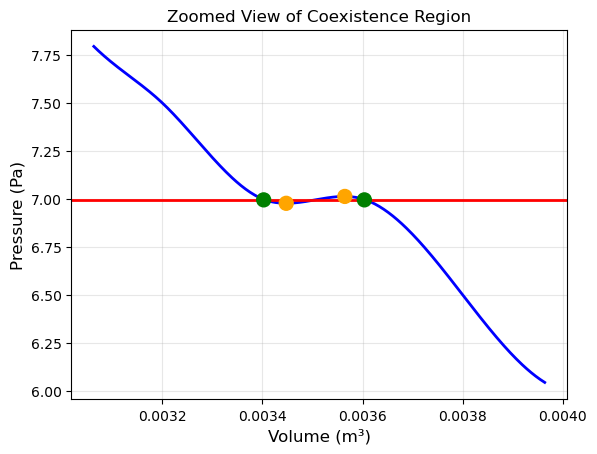

In [9]:
if len(maxima_indices) > 0 and len(minima_indices) > 0:
    # Take the most prominent maxima and minima (usually there's one of each)
    v_max = volume_fine[maxima_indices[0]]
    p_max = pressure_fine[maxima_indices[0]]
    v_min = volume_fine[minima_indices[0]]
    p_min = pressure_fine[minima_indices[0]]
    
    print(f"\nSpinodal points:")
    print(f"  Local maximum: V = {v_max:.6f} m³, P = {p_max:.3f} Pa")
    print(f"  Local minimum: V = {v_min:.6f} m³, P = {p_min:.3f} Pa")
    
    # Maxwell construction: Find pressure P_m where areas are equal
    def area_difference(P_m):
        """Calculate difference between areas above and below P_m"""
        # Find volumes where P = P_m (intersection points)
        # We need to find three intersection points: v1 (liquid), v2 (middle), v3 (vapor)
        
        # Find where pressure_fine crosses P_m
        crossings = np.where(np.diff(np.sign(pressure_fine - P_m)))[0]
        
        if len(crossings) < 3:
            return np.inf  # Not enough crossings
            
        # The crossings should be: v1 < v_max < v2 < v_min < v3
        v1 = volume_fine[crossings[0]]  # Liquid side
        v2 = volume_fine[crossings[1]]  # Middle crossing (unstable region)
        v3 = volume_fine[crossings[2]]  # Vapor side
        
        # Calculate area A1: ∫ from v1 to v2 of (P - P_m) dV
        mask1 = (volume_fine >= v1) & (volume_fine <= v2)
        if np.sum(mask1) < 2:
            return np.inf
            
        v1_range = volume_fine[mask1]
        p1_range = pressure_fine[mask1]
        
        # Calculate area A2: ∫ from v2 to v3 of (P_m - P) dV
        mask2 = (volume_fine >= v2) & (volume_fine <= v3)
        if np.sum(mask2) < 2:
            return np.inf
            
        v2_range = volume_fine[mask2]
        p2_range = pressure_fine[mask2]
        
        # Numerical integration using Simpson's rule
        A1 = simpson(p1_range - P_m, v1_range)
        A2 = simpson(P_m - p2_range, v2_range)
        
        # Return absolute difference (we want A1 = A2)
        return abs(A1 - A2)
    
    # Find P_m that minimizes area difference
    # Search between p_min and p_max
    bounds = (p_min, p_max)
    
    # Try multiple starting points
    P_m_candidates = []
    area_diffs = []
    
    for P_start in np.linspace(p_min, p_max, 20):
        result = minimize(area_difference, P_start, bounds=[bounds], method='L-BFGS-B')
        if result.success:
            P_m_candidates.append(result.x[0])
            area_diffs.append(result.fun)
    
    if P_m_candidates:
        # Take the best result (smallest area difference)
        best_idx = np.argmin(area_diffs)
        P_m = P_m_candidates[best_idx]
        
        # Now find the corresponding volumes
        # Find crossings at P_m
        crossings = np.where(np.diff(np.sign(pressure_fine - P_m)))[0]        
        if len(crossings) >= 3:
            v_liquid = volume_fine[crossings[0]]
            v_vapor = volume_fine[crossings[2]]
            
            v_zoom_min = v_liquid * 0.9
            v_zoom_max = v_vapor * 1.1
            zoom_mask = (volume_fine >= v_zoom_min) & (volume_fine <= v_zoom_max)
            
            plt.plot(volume_fine[zoom_mask], pressure_fine[zoom_mask], 'b-', linewidth=2)
            plt.axhline(y=P_m, color='red', linestyle='-', linewidth=2)
            
            # Mark key points
            plt.scatter([v_liquid, v_max, v_min, v_vapor], 
                       [P_m, p_max, p_min, P_m], 
                       color=['green', 'orange', 'orange', 'green'], 
                       s=100, zorder=5)
            
            plt.xlabel('Volume (m³)', fontsize=12)
            plt.ylabel('Pressure (Pa)', fontsize=12)
            plt.title('Zoomed View of Coexistence Region', fontsize=12)
            plt.grid(True, alpha=0.3)


Spinodal points:
  Local maximum: V = 3.564565 m³, P = 7.013 Pa
  Local minimum: V = 3.447447 m³, P = 6.977 Pa


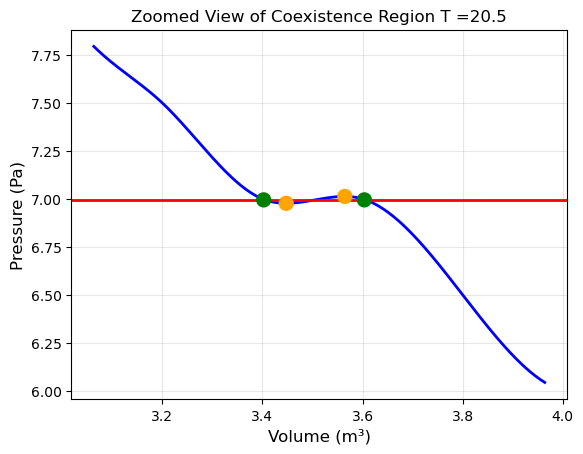


Spinodal points:
  Local maximum: V = 3.793293 m³, P = 7.000 Pa
  Local minimum: V = 3.663664 m³, P = 6.968 Pa


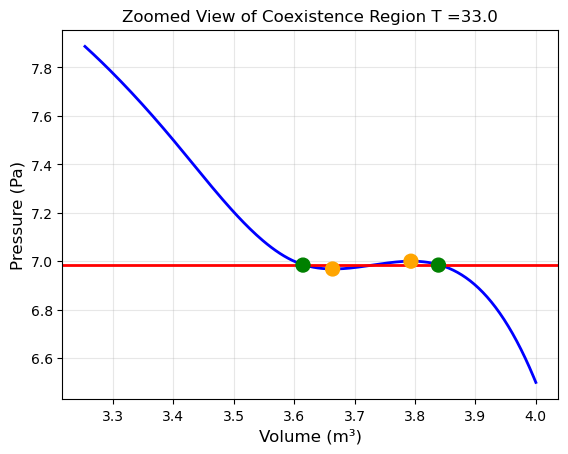


Spinodal points:
  Local maximum: V = 3.800300 m³, P = 7.000 Pa
  Local minimum: V = 3.667167 m³, P = 6.962 Pa


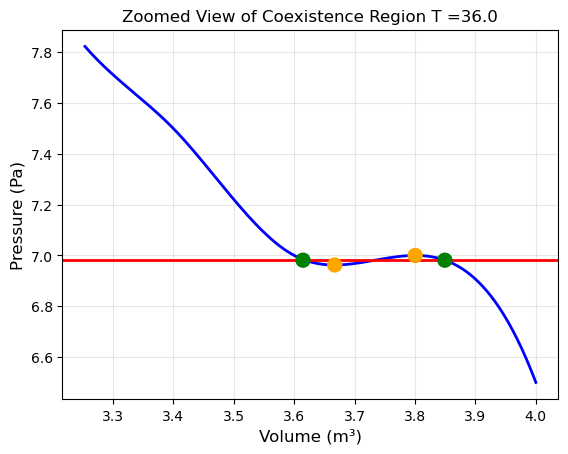

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize  as opt
import scipy.ndimage as ndi
import scipy.signal as sig
import scipy.integrate as integ
import scipy.interpolate as inter

sheets = ["Sheet1","Sheet2","Sheet3","Sheet4","Sheet5","Sheet6","Sheet7","Sheet8"]
temperature = np.array([20.5,33,36,39,42,45,47,50])

datas = np.array([])
p_list = []
v_list = []

for i,p in enumerate(sheets):
    data = pd.read_excel('Data_modified.xlsx',p)
    datas = np.append(datas,data)
    p = []
    v = []
    for g in data['Pressure(E5)Pa']:
        p.append(g)
    for g in data['Volume(E-03)L']:
        v.append(g)
    p_list.append(p)
    v_list.append(v)

    p_element = np.array(data['Pressure(E5)Pa']) 
    v_element = np.array(data['Volume(E-03)L'])

    volume_fine = np.linspace(min(v_element), max(v_element), 1000)

    sorted_indices = np.argsort(v_element)
    volume = v_element[sorted_indices]
    pressure = p_element[sorted_indices]
    
    cs = inter.CubicSpline(volume, pressure)
    pressure_fine = cs(volume_fine)

    # Find peaks in pressure (local maxima)
    maxima_indices, _ = sig.find_peaks(pressure_fine)
    # Find valleys (local minima) by looking for peaks in -pressure
    minima_indices, _ = sig.find_peaks(-pressure_fine)

    if len(maxima_indices) > 0 and len(minima_indices) > 0:
        # Take the most prominent maxima and minima (usually there's one of each)
        v_max = volume_fine[maxima_indices[0]]
        p_max = pressure_fine[maxima_indices[0]]
        v_min = volume_fine[minima_indices[0]]
        p_min = pressure_fine[minima_indices[0]]
        
        print(f"\nSpinodal points:")
        print(f"  Local maximum: V = {v_max:.6f} m³, P = {p_max:.3f} Pa")
        print(f"  Local minimum: V = {v_min:.6f} m³, P = {p_min:.3f} Pa")
        
        # Maxwell construction: Find pressure P_m where areas are equal
        def area_difference(P_m):
            """Calculate difference between areas above and below P_m"""
            # Find volumes where P = P_m (intersection points)
            # We need to find three intersection points: v1 (liquid), v2 (middle), v3 (vapor)
            
            # Find where pressure_fine crosses P_m
            crossings = np.where(np.diff(np.sign(pressure_fine - P_m)))[0]
            
            if len(crossings) < 3:
                return np.inf  # Not enough crossings
                
            # The crossings should be: v1 < v_max < v2 < v_min < v3
            v1 = volume_fine[crossings[0]]  # Liquid side
            v2 = volume_fine[crossings[1]]  # Middle crossing (unstable region)
            v3 = volume_fine[crossings[2]]  # Vapor side
            
            # Calculate area A1: ∫ from v1 to v2 of (P - P_m) dV
            mask1 = (volume_fine >= v1) & (volume_fine <= v2)
            if np.sum(mask1) < 2:
                return np.inf
                
            v1_range = volume_fine[mask1]
            p1_range = pressure_fine[mask1]
            
            # Calculate area A2: ∫ from v2 to v3 of (P_m - P) dV
            mask2 = (volume_fine >= v2) & (volume_fine <= v3)
            if np.sum(mask2) < 2:
                return np.inf
                
            v2_range = volume_fine[mask2]
            p2_range = pressure_fine[mask2]
            
            # Numerical integration using Simpson's rule
            A1 = integ.simpson(p1_range - P_m, v1_range)
            A2 = integ.simpson(P_m - p2_range, v2_range)
            
            # Return absolute difference (we want A1 = A2)
            return abs(A1 - A2)
        
        # Find P_m that minimizes area difference
        # Search between p_min and p_max
        bounds = (p_min, p_max)
        
        # Try multiple starting points
        P_m_candidates = []
        area_diffs = []
        
        for P_start in np.linspace(p_min, p_max, 20):
            result = opt.minimize(area_difference, P_start, bounds=[bounds], method='L-BFGS-B')
            if result.success:
                P_m_candidates.append(result.x[0])
                area_diffs.append(result.fun)
        
        if P_m_candidates:
            # Take the best result (smallest area difference)
            best_idx = np.argmin(area_diffs)
            P_m = P_m_candidates[best_idx]
            
            # Now find the corresponding volumes
            # Find crossings at P_m
            crossings = np.where(np.diff(np.sign(pressure_fine - P_m)))[0]        
            if len(crossings) >= 3:
                v_liquid = volume_fine[crossings[0]]
                v_vapor = volume_fine[crossings[2]]
                
                v_zoom_min = v_liquid * 0.9
                v_zoom_max = v_vapor * 1.1
                zoom_mask = (volume_fine >= v_zoom_min) & (volume_fine <= v_zoom_max)
                
                plt.plot(volume_fine[zoom_mask], pressure_fine[zoom_mask], 'b-', linewidth=2)
                plt.axhline(y=P_m, color='red', linestyle='-', linewidth=2)
                
                # Mark key points
                plt.scatter([v_liquid, v_max, v_min, v_vapor], 
                        [P_m, p_max, p_min, P_m], 
                        color=['green', 'orange', 'orange', 'green'], 
                        s=100, zorder=5)
                
                plt.xlabel('Volume (m³)', fontsize=12)
                plt.ylabel('Pressure (Pa)', fontsize=12)
                plt.title(f'Zoomed View of Coexistence Region T ={temperature[i]}', fontsize=12)
                plt.grid(True, alpha=0.3)
                plt.show()